In [1]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const

In [2]:
expTime = 5
intTime = 30*24.

stellarVariability = True
randomOrientation = False
albedo = 'theo'
polEff = 1.
filt = 'V'

highPassSize = 20

savePlots = False

In [3]:
systems = eppe.Systems(load=True, polEff=polEff, randomOrientation=randomOrientation, albedo=albedo)

# mission = eppe.mission(systems, rad=0.8, filt=filt) # POMM
mission = eppe.mission(systems, filt=filt, trans=0.9) # EPPE

In [4]:
systems.updateAlbedos(mission.filterObj)

In [23]:
stokesCurves = mission.observe_polarization(expTime, intTime, stellarVariability=stellarVariability)
stokesCurves_ideal = mission.observe_polarization(expTime, intTime, photonNoise=False, pStart=0)
_, fstars, _, _ = mission.observe_photometric(expTime, intTime, photonNoise=True, pStart=0)

In [5]:
# i = 1
# i = systems.name_to_index('WASP-12 b')
i = systems.name_to_index('HD 189733 b')
# i = systems.name_to_index('HD 209458 b')
# i = systems.name_to_index('KELT-7 b')
# i = systems.name_to_index('KELT-9 b')
# i = systems.name_to_index('tau Boo b')
# i = systems.name_to_index('ups And b')
# i = systems.name_to_index('GJ 3323 b')

systems.index_details(i)

Name: HD 189733 b
Radius: 1.13 Rjup
Period: 2.22 days
Equilibrium Temperature: 1192 K
Transit Depth: 2.397%
Distance: 20 pc


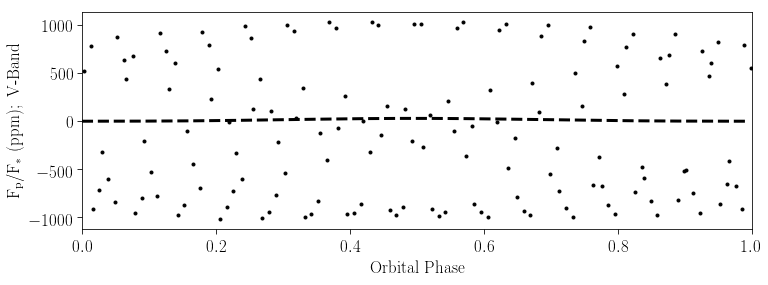

In [25]:
fig = eppe.plot_lightcurve(stokesCurves[i], filt, fstars[i], stokesCurve_ideal=stokesCurves_ideal[i], lines=True)

if savePlots:
    fname = 'saves/'+'_'.join(systems.catalogue['name'][i].split(' '))+'_lightcurve'
    if stellarVariability:
        fname += '_stellarVariability'
    if albedo=='theo':
        fname += '_theoAg'
    fname += '.png'
    fig.savefig(fname, dpi=300, bbox_inches='tight')
plt.show(fig)

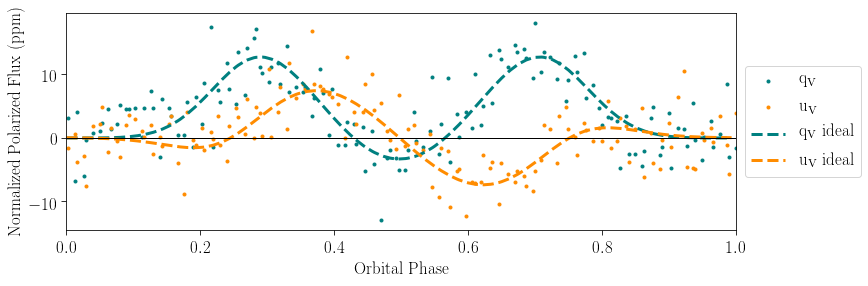

In [26]:
fig = eppe.plot_QU(stokesCurves[i], filt, normed=True, stokesCurve_ideal=stokesCurves_ideal[i], lines=True)#, highPassSize=highPassSize)

if savePlots:
    fname = 'saves/'+'_'.join(systems.catalogue['name'][i].split(' '))+'_QUcurve'
    if stellarVariability:
        fname += '_stellarVariability'
    if albedo=='theo':
        fname += '_theoAg'
    fname += '.png'
    fig.savefig(fname, dpi=300, bbox_inches='tight')
plt.show(fig)

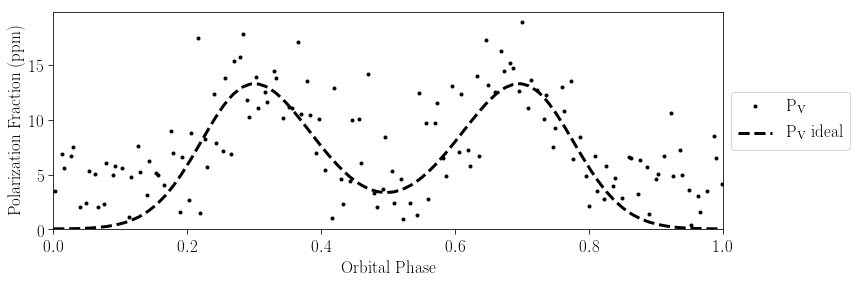

In [27]:
fig = eppe.plot_P(stokesCurves[i], filt, stokesCurve_ideal=stokesCurves_ideal[i], lines=True)

if savePlots:
    fname = 'saves/'+'_'.join(systems.catalogue['name'][i].split(' '))+'_Pcurve'
    if stellarVariability:
        fname += '_stellarVariability'
    if albedo=='theo':
        fname += '_theoAg'
    fname += '.png'
    fig.savefig(fname, dpi=300, bbox_inches='tight')
plt.show(fig)